In [116]:
import fft_code as code
import librosa
from librosa import display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from IPython.display import Audio
from scipy.optimize import curve_fit

In [144]:
def gaus(x, a, x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def gaussian_fit_params(section, x):         
    n = len(x)                                 
    popt,pcov = curve_fit(gaus, x, section, p0=[1, np.mean(x), np.std(x)], maxfev = 20000)
    return popt
    

fft was complete
fft was complete
fft was complete
fft was complete
fft was complete


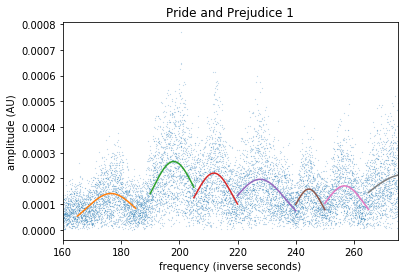

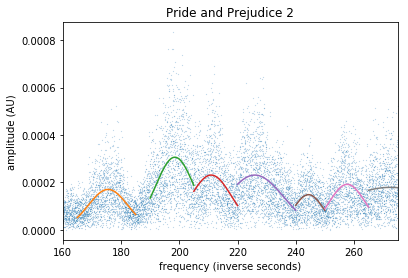

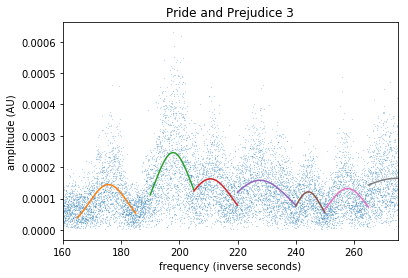

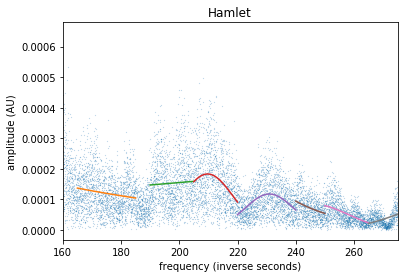

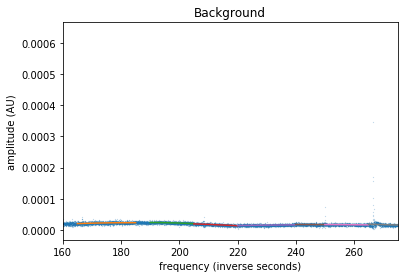

In [145]:
PPs = ["PP_1.wav", "PP_2.wav", "PP_3.wav", "hamlet.wav", "background.wav"] #recordings of the same passage of pride and prejudice
titles = ["Pride and Prejudice 1", "Pride and Prejudice 2", "Pride and Prejudice 3", "Hamlet", "Background"]
n = 2160000 #length for this sample length
ffts = np.zeros((len(PPs), n))
freq_peaks = [(165, 185), (190, 205), (205, 220), (220, 240), (240, 250), (250, 265), 
              (265, 300), (300, 310), (315, 330), (330, 345), (345, 350), (350, 360), 
              (360, 375), (375, 395), (395, 450)]
mean_params = [[] for i in range(5)]
variance_params = [[] for i in range(5)]
mag_params = [[] for i in range(5)]

              
for i in np.arange(len(PPs)):
    fft_i, x, samplerate = code.fft_wrapper(PPs[i],pass_title = titles[i])
    #fft_i = fft_i/(np.max(fft_i))
    for (a, b) in freq_peaks: 
        xp = x[np.where(np.logical_and(x>=a, x<=b))]
        section = fft_i[np.where(np.logical_and(x>=a, x<=b))]
        a, x0, sigma = gaussian_fit_params(section, xp)
        plt.plot(xp, gaus(xp, a, x0, sigma))
        mag_params[i].append(gaussian_fit_params(section, xp)[0])
        mean_params[i].append(gaussian_fit_params(section, xp)[1])
        variance_params[i].append(gaussian_fit_params(section, xp)[2])

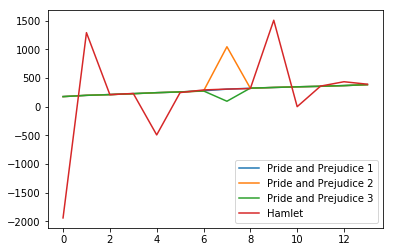

In [154]:
# plot of mean
for i in range(4):
    plt.plot(mean_params[i][:-1])
    plt.legend(titles)

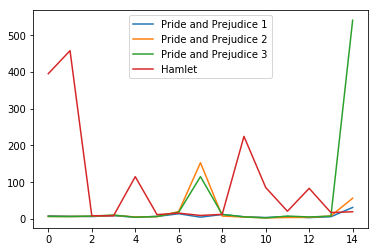

In [164]:
# plot of variance
for i in range(4):
    plt.plot(variance_params[i])
    plt.legend(titles)